## [DATATHON] Make Your OTT 🎥🎬

**[데이터 분석 방향]**

* 어떤 OTT 서비스를 사용하는 것이 좋을까?
* 모든 OTT를 구독하기는 너무 비싸잖아!
* 바쁘다 바빠 현대사회 모든 OTT를 구독하기는 시간이 너무 없잖아!
* 가지고 있는 데이터들을 사용하여 내 취향의 OTT를 골라보자😀


* Wavve, Watcha의 데이터는 구할 수 없었던 관계로 Netflix, Amazon, Disney 총 3가지를 비교한다.

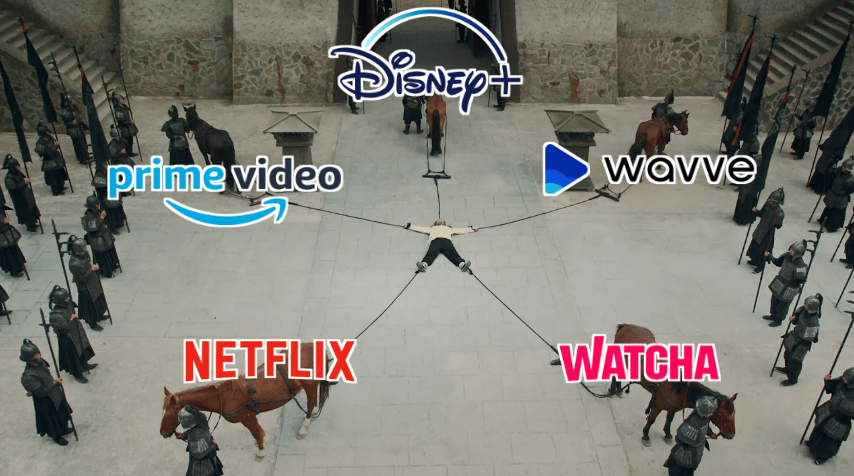

### Table of Contents

### 1. Experiment Environment Set-up

* 1.1 Install Package
* 1.2 Import Libraries

### 2. Load and Preprocessing Data

* 2.1 Import Data
* 2.2 Data Information
* 2.3 Preprocessing Data

### 3. Data Analysis and Visualization

* 3.1 Content Analysis
* 3.2 Actor Analysis
* 3.3 Director Analysis
* 3.4 Country Analysis
* 3.5 Genre Analysis
* 3.6 Age Group Analysis
* 3.7 Adult Contents with Genre

### 4. Content Recommendation

* 4.1 Netflix
* 4.2 Amazon

### 5. Conclusion

***

### 1. Experiment Environment Set-up

### 1.1 Install Package

In [1]:
!pip install country_converter --upgrade

In [2]:
!pip install squarify

### 1.2 Import Libraries

In [3]:
import os
import math
import squarify
import numpy as np
import pandas as pd
import seaborn as sns
import geopandas as gpd      # 공간데이터
import missingno as msno
import country_converter as coco

import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter
from matplotlib import gridspec

### 2. Load and Preprocessing Data

### 2.1 Load Data

### 2.1.1 Netflix

In [4]:
# 넷플릭스 데이터 불러오기
datapath_netflix = os.getenv('HOME') + '/aiffel/amazone/netflix_titles.csv'
netflix = pd.read_csv(datapath_netflix, parse_dates=True)
netflix.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### 2.1.2 Amazon

In [5]:
# 아마존 데이터 불러오기
datapath_amazon = os.getenv('HOME') + '/aiffel/amazone/amazon_prime_titles.csv'
amazon = pd.read_csv(datapath_amazon, parse_dates=True)
print("[Amazon Data]")
amazon.head()

[Amazon Data]


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,The Grand Seduction,Don McKellar,"Brendan Gleeson, Taylor Kitsch, Gordon Pinsent",Canada,"March 30, 2021",2014,NaN,113 min,"Comedy, Drama",A small fishing village must procure a local d...
1,s2,Movie,Take Care Good Night,Girish Joshi,"Mahesh Manjrekar, Abhay Mahajan, Sachin Khedekar",India,"March 30, 2021",2018,13+,110 min,"Drama, International",A Metro Family decides to fight a Cyber Crimin...
2,s3,Movie,Secrets of Deception,Josh Webber,"Tom Sizemore, Lorenzo Lamas, Robert LaSardo, R...",United States,"March 30, 2021",2017,NaN,74 min,"Action, Drama, Suspense",After a man discovers his wife is cheating on ...
3,s4,Movie,Pink: Staying True,Sonia Anderson,"Interviews with: Pink, Adele, Beyoncé, Britney...",United States,"March 30, 2021",2014,NaN,69 min,Documentary,"Pink breaks the mold once again, bringing her ..."
4,s5,Movie,Monster Maker,Giles Foster,"Harry Dean Stanton, Kieran O'Brien, George Cos...",United Kingdom,"March 30, 2021",1989,NaN,45 min,"Drama, Fantasy",Teenage Matt Banting wants to work with a famo...


### 2.1.3 Disney

In [6]:
# 디즈니 데이터 불러오기
datapath_disney = os.getenv('HOME') + '/aiffel/amazone/disney_plus_titles.csv'
disney = pd.read_csv(datapath_disney, parse_dates=True)
disney.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Duck the Halls: A Mickey Mouse Christmas Special,"Alonso Ramirez Ramos, Dave Wasson","Chris Diamantopoulos, Tony Anselmo, Tress MacN...",NaN,"November 26, 2021",2016,TV-G,23 min,"Animation, Family",Join Mickey and the gang as they duck the halls!
1,s2,Movie,Ernest Saves Christmas,John Cherry,"Jim Varney, Noelle Parker, Douglas Seale",NaN,"November 26, 2021",1988,PG,91 min,Comedy,Santa Claus passes his magic bag to a new St. ...
2,s3,Movie,Ice Age: A Mammoth Christmas,Karen Disher,"Raymond Albert Romano, John Leguizamo, Denis L...",United States,"November 26, 2021",2011,TV-G,23 min,"Animation, Comedy, Family",Sid the Sloth is on Santa's naughty list.
3,s4,Movie,The Queen Family Singalong,Hamish Hamilton,"Darren Criss, Adam Lambert, Derek Hough, Alexa...",NaN,"November 26, 2021",2021,TV-PG,41 min,Musical,"This is real life, not just fantasy!"
4,s5,TV Show,The Beatles: Get Back,NaN,"John Lennon, Paul McCartney, George Harrison, ...",NaN,"November 25, 2021",2021,NaN,1 Season,"Docuseries, Historical, Music",A three-part documentary from Peter Jackson ca...


### 2.2 Data Information

### 2.2.1 Netflix

In [7]:
# 기본정보
netflix.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [8]:
netflix.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362


In [9]:
# release_year의 데이터만 objec가 아닌 int이므로 따로 확인
netflix.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

,count,mean,std,min,25%,50%,75%,max
release_year,8807.000000,2014.180198,8.819312,1925.000000,2013.000000,2017.000000,2019.000000,2021.000000


**[Netflix Data 정리]**

이 두 테이블은 고유 값, 최상위 값, 최상위 값 빈도에 대한 정보를 제공합니다. 특히 흥미로운 통계를 보여주는 기능이 거의 없습니다.

* `type` - 2개 카테고리, 대부분 영화이다.
* `director` - Rajiv Chilaka는 무려 19편의 작품에 참여하고 감독했으며, 이 컬럼에서 가장 많이 등장하는 이름이다. 결측치를 채우기 위해 최빈도 값을 사용하는 경우도 있지만 여기에서는 사용하지 않는다. 결측치는 `director_data_unknown`으로 대체한다.
* `cast`- David Attenborough는 많은 영화와 쇼에 출연한 유일한 배우이다. 결측치는 `actor_data_unknown`으로 대체한다.
* `country` - 미국은 넷플릭스 콘텐츠의 대부분을 생산하고 있다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `date_added` - January 1, 2020은 콘텐츠가 플랫폼에서 온라인으로 가장 많이 전환된 날짜이다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `rating` - 17개 카테고리, 이 데이터를 분석하여 아마존 프라임이 주요 대상으로 삼는 잠재고객과 연령대를 확인할 수 있다.
* `listed_in` - 이 컬럼에는 514개의 고유 항목이 있지만 여기에서 의미있는 것을 찾기 위해 데이터를 나눠서 살펴볼 수 있다.
* `release_year` - 이 정보는 제작된 콘텐츠의 타임라인을 제공한다. 이 데이터의 시간 범위는 1925년에서 2021년까지이며, 이는 다양한 연도의 콘텐츠가 얼마나 인기가 있는지 확인하는 데 도움이 될 수 있다.
* `descriptions` - 이 정보는 콘텐츠가 어떤 종류의 주제를 기반으로 하는지 이해하는 데 도움이 될 수 있다.

### 2.2.2 Amazon

In [10]:
amazon.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9668 entries, 0 to 9667
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       9668 non-null   object
 1   type          9668 non-null   object
 2   title         9668 non-null   object
 3   director      7586 non-null   object
 4   cast          8435 non-null   object
 5   country       672 non-null    object
 6   date_added    155 non-null    object
 7   release_year  9668 non-null   int64 
 8   rating        9331 non-null   object
 9   duration      9668 non-null   object
 10  listed_in     9668 non-null   object
 11  description   9668 non-null   object
dtypes: int64(1), object(11)
memory usage: 906.5+ KB


In [11]:
amazon.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

,count,unique,top,freq
show_id,9668,9668,s1,1
type,9668,2,Movie,7814
title,9668,9668,The Grand Seduction,1
director,7586,5774,Mark Knight,113
cast,8435,7927,Maggie Binkley,56
country,672,86,United States,253
date_added,155,84,"March 30, 2021",14
rating,9331,24,13+,2117
duration,9668,219,1 Season,1342
listed_in,9668,518,Drama,986


In [12]:
amazon.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

,count,mean,std,min,25%,50%,75%,max
release_year,9668.000000,2008.341849,18.922482,1920.000000,2007.000000,2016.000000,2019.000000,2021.000000


**[Amazon Data 정리]**

위 두 표는 고유 값, 최상위 값, 최상위 값 빈도에 대한 정보를 보여준다. 특히 의미있는 통계를 보여주는 기능이 거의 없다.

* `type` - 2개 카테고리, 대부분 영화이다.
* `director` - Mark Knight는 무려 113편의 작품에 참여하고 감독했으며, 이 컬럼에서 가장 많이 등장하는 이름이다. 결측치를 채우기 위해 최빈도 값을 사용하는 경우도 있지만 여기에서는 사용하지 않는다. 결측치는 `director_data_unknown`으로 대체한다.
* `cast`- Maggie Binkley는 많은 영화와 쇼에 출연한 유일한 배우이다. 결측치는 `actor_data_unknown`으로 대체한다.
* `country` - 미국은 아마존 프라임 콘텐츠의 대부분을 생산하고 있다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `date_added` - March 30, 2021은 콘텐츠가 플랫폼에서 온라인으로 가장 많이 전환된 날짜이다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `rating` - 24개 카테고리, 이 데이터를 분석하여 아마존 프라임이 주요 대상으로 삼는 잠재고객과 연령대를 확인할 수 있다.
* `listed_in` - 이 컬럼에는 518개의 고유 항목이 있지만 여기에서 의미있는 것을 찾기 위해 데이터를 나눠서 살펴볼 수 있다.
* `release_year` - 이 정보는 제작된 콘텐츠의 타임라인을 제공한다. 이 데이터의 시간 범위는 1920년에서 2021년까지이며, 이는 다양한 연도의 콘텐츠가 얼마나 인기가 있는지 확인하는 데 도움이 될 수 있다.
* `descriptions` - 이 정보는 콘텐츠가 어떤 종류의 주제를 기반으로 하는지 이해하는 데 도움이 될 수 있다.

### 2.2.3 Disney

In [13]:
disney.info(verbose = True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1450 entries, 0 to 1449
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       1450 non-null   object
 1   type          1450 non-null   object
 2   title         1450 non-null   object
 3   director      977 non-null    object
 4   cast          1260 non-null   object
 5   country       1231 non-null   object
 6   date_added    1447 non-null   object
 7   release_year  1450 non-null   int64 
 8   rating        1447 non-null   object
 9   duration      1450 non-null   object
 10  listed_in     1450 non-null   object
 11  description   1450 non-null   object
dtypes: int64(1), object(11)
memory usage: 136.1+ KB


In [14]:
disney.describe(include = [np.object]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black' })

,count,unique,top,freq
show_id,1450,1450,s1,1
type,1450,2,Movie,1052
title,1450,1450,Duck the Halls: A Mickey Mouse Christmas Special,1
director,977,609,Jack Hannah,17
cast,1260,1193,Winston Hibler,10
country,1231,89,United States,1005
date_added,1447,167,"November 12, 2019",722
rating,1447,9,TV-G,318
duration,1450,158,1 Season,219
listed_in,1450,329,"Animation, Comedy, Family",124


In [15]:
disney.describe(include = [np.number]).T.style.set_properties(**{'background-color':'white',
                                     'color': 'black',
                                      'border-color':'black'})

,count,mean,std,min,25%,50%,75%,max
release_year,1450.000000,2003.091724,21.860162,1928.000000,1999.000000,2011.000000,2018.000000,2021.000000


**[Disney Data 정리]**

이 두 표는 고유 값, 최상위 값, 최상위 값의 빈도에 대한 정보를 보여준다. 특히 의미있는 통계를 보여주는 기능은 거의 없다.

* `type` - 2개 카테고리, 대부분 영화이다.
* `director` - Jack Hannah는 무려 17편의 작품에 참여하고 감독했으며, 이 컬럼에서 가장 많이 등장하는 이름이다. 결측치를 채우기 위해 최빈도 값을 사용하는 경우도 있지만 여기에서는 사용하지 않는다. 결측치는 `director_data_unknown`으로 대체한다.
* `cast`- jim cummings는 많은 영화와 쇼에 출연한 유일한 배우이다. 결측치는 `actor_data_unknown`으로 대체한다.
* `country` - 미국은 디즈니 플러스 콘텐츠의 대부분을 생산하고 있다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `date_added` - November 12, 2019은 콘텐츠가 플랫폼에서 온라인으로 가장 많이 전환된 날짜이다. 이 최빈값으로 결측치를 대체하는 것을 고려해 볼 수 있다.
* `rating` - 9개 카테고리, 이 데이터를 분석하여 디즈니 플러스 주요 대상으로 삼는 잠재고객과 연령대를 확인할 수 있다.
* `listed_in` - 이 컬럼에는 329개의 고유 항목이 있지만 여기에서 의미있는 것을 찾기 위해 데이터를 나눠서 살펴볼 수 있다.
* `release_year` - 이 정보는 제작된 콘텐츠의 타임라인을 제공한다. 이 데이터의 시간 범위는 1928년에서 2021년까지이며, 이는 다양한 연도의 콘텐츠가 얼마나 인기가 있는지 확인하는 데 도움이 될 수 있다.
* `descriptions` - 이 정보는 콘텐츠가 어떤 종류의 주제를 기반으로 하는지 이해하는 데 도움이 될 수 있다.

### 2.3 Preprocessing Data

* 각 데이터별 결측치를 그래프로 나타내어 확인한다.
* 확인된 결측치를 각 데이터별로 동일한 방법을 사용해 처리한다.

### 2.3.1 Check for Missing Values

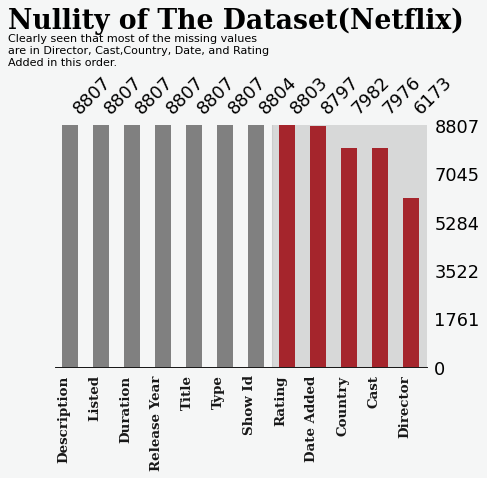

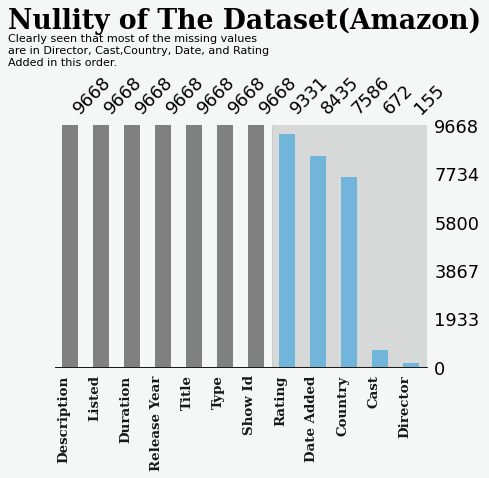

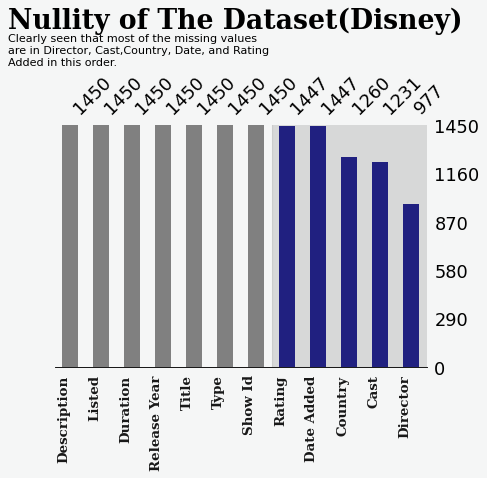

In [16]:
# 넷플릭스
fig, ax = plt.subplots(dpi = 80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','grey','#b20710','#b20710','#b20710','#b20710','#b20710']
msno.bar(netflix,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))
labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
ax.set_xticklabels(labels,{'font':'serif', 'color':'black','weight':'bold','size':12}, alpha = 0.9,rotation = 90)
ax.text(-2,1.4,'Nullity of The Dataset(Netflix)' ,{'font':'serif', 'color':'black','weight':'bold','size':24})
ax.text(-2,1.25,'Clearly seen that most of the missing values \nare in Director, Cast,Country, Date, and Rating \nAdded in this order.')
ax.axvspan(6.5,12.5,0,7787, color = 'grey', alpha = 0.25)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

# 아마존
fig, ax = plt.subplots(dpi = 80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','grey','#6ec7f9','#6ec7f9','#6ec7f9','#6ec7f9','#6ec7f9']
msno.bar(amazon,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))
labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
ax.set_xticklabels(labels,{'font':'serif', 'color':'black','weight':'bold','size':12}, alpha = 0.9,rotation = 90)
ax.text(-2,1.4,'Nullity of The Dataset(Amazon)' ,{'font':'serif', 'color':'black','weight':'bold','size':24})
ax.text(-2,1.25,'Clearly seen that most of the missing values \nare in Director, Cast,Country, Date, and Rating \nAdded in this order.')
ax.axvspan(6.5,12.5,0,7787, color = 'grey', alpha = 0.25)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

# 디즈니
fig, ax = plt.subplots(dpi = 80)
ax.set_facecolor('#f5f6f6')
fig.patch.set_facecolor('#f5f6f6')

color = ['grey','grey','grey','grey','grey','grey','grey','#000080','#000080','#000080','#000080','#000080']
msno.bar(disney,fontsize =16, color = color, sort = 'descending', ax = ax, figsize = (12,6))
labels = ['Description','Listed','Duration', 'Release Year', 'Title', 'Type','Show Id','Rating', 'Date Added','Country', 'Cast','Director']
ax.set_xticklabels(labels,{'font':'serif', 'color':'black','weight':'bold','size':12}, alpha = 0.9,rotation = 90)
ax.text(-2,1.4,'Nullity of The Dataset(Disney)' ,{'font':'serif', 'color':'black','weight':'bold','size':24})
ax.text(-2,1.25,'Clearly seen that most of the missing values \nare in Director, Cast,Country, Date, and Rating \nAdded in this order.')
ax.axvspan(6.5,12.5,0,7787, color = 'grey', alpha = 0.25)
ax.set_yticklabels('')
ax.spines['bottom'].set_visible(True)
fig.show()

**[결측치 내용 정리]**

넷플릭스, 아마존, 디즈니 데이터의 그래프는 총 5개 열 `Rating`, `Date_added`, `Country`, `Cast`, `Director`의 결측치가 있음을 보여준다. 대부분의 결측치는 `Director`, `Cast`에서 확인할 수 있다.

이 결측치를 채우는 위해 다양한 기술을 사용한다. 여기에서는 `Rating`, `Date_added`, `Country`, `Cast`, `Director`의 결측치를 다룬다.

결측치를 다루는 방법 중 대표적인 방법 3가지 : 

 * `.dropna()` - 데이터 세트에서 결측치를 삭제한다. 이는 결측치의 양이 상당히 적거나 데이터가 충분한 경우에 유용하다.
 * `.fillna()` - 사용자 임의의 값 또는 데이터 통계의 값으로 결측치를 채운다.
 * 세 번째는 결측치에 대해 몇 가지 가정을 하고 조건문을 사용하여 다른 페더의 결측치를 예측하고 채운다.

여기서는 아래와 같이 결측치를 다루도록 한다.

1. `Rating` - mode of the rating
2. `Date_added` - mode of the date_added
3. `Country` - mode of the county series
4. `Cast` - NoDataAvailable
5. `Director` - NoDataAvailable

### 2.3.2 Handling Missing Values

In [17]:
# 넷플릭스(`Rating`, `Duration`)의 경우 정보를 직접 찾아서 데이터 추가

# rating 결측치 정리
netflix.at[5989, "rating"]= "PG-13"
netflix.at[6827, "rating"]= "NC-17"
netflix.at[7312, "rating"]= "TV-Y7"
netflix.at[7537, "rating"]= "PG-13"
netflix.at[5541, "rating"]= "TV-MA"
netflix.at[5794, "rating"]= "TV-MA"
netflix.at[5813, "rating"]= "TV-MA"

# duration 결측치 정리
netflix.at[5541, "duration"]= "74 min"
netflix.at[5794, "duration"]= "84 min"
netflix.at[5813, "duration"]= "66 min"

In [18]:
netflix_orig = netflix.copy() # 원래 데이터셋 카피

# 결측치 다루기
netflix['director'] = netflix['director'].fillna('NoDataAvailable')
netflix['country'] = netflix['country'].fillna(netflix['country'].mode()[0]) 
netflix['cast'] = netflix['cast'].fillna('NoDataAvailable')
netflix['date_added'] = netflix['date_added'].fillna(netflix['date_added'].mode()[0]) 
netflix['rating'] = netflix['rating'].fillna(netflix['rating'].mode()[0])  
print('count of values')
print(netflix.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [19]:
# 아마존
amazon_orig = amazon.copy() # 원래 데이터셋 카피

# 결측치 다루기
amazon['director'] = amazon['director'].fillna('NoDataAvailable')
amazon['country'] = amazon['country'].fillna(amazon['country'].mode()[0]) 
amazon['cast'] = amazon['cast'].fillna('NoDataAvailable')
amazon['date_added'] = amazon['date_added'].fillna(amazon['date_added'].mode()[0]) 
amazon['rating'] = amazon['rating'].fillna(amazon['rating'].mode()[0])  
print('count of values')
print(amazon.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


In [20]:
# 디즈니
disney_orig = disney.copy() # 원래 데이터셋 카피

# 결측치 다루기
disney['director'] = disney['director'].fillna('NoDataAvailable')
disney['country'] = disney['country'].fillna(disney['country'].mode()[0]) 
disney['cast'] = disney['cast'].fillna('NoDataAvailable')
disney['date_added'] = disney['date_added'].fillna(disney['date_added'].mode()[0]) 
disney['rating'] = disney['rating'].fillna(disney['rating'].mode()[0])  
print('count of values')
print(disney.isna().sum())

count of values
show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64


* 결측치 처리 완료

### 3. Data Analysis and Visualization

### 3.1 Content Analysis

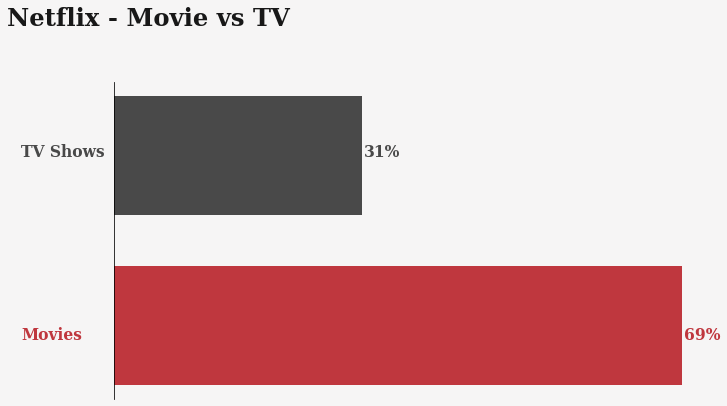

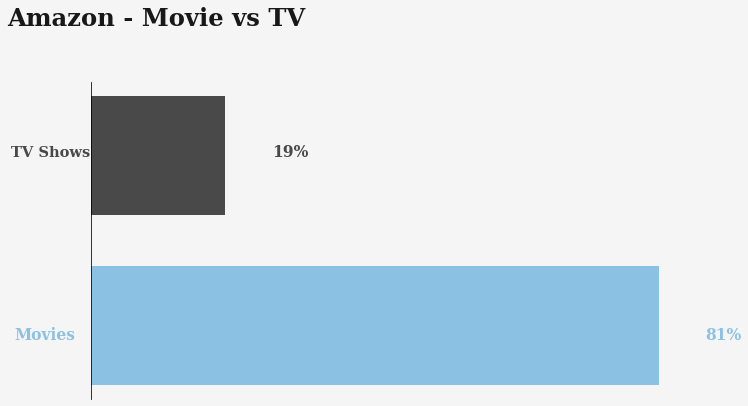

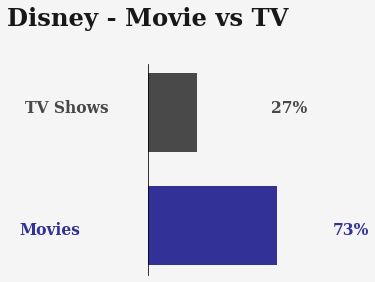

In [21]:
# 넷플릭스

# type을 기준으로 가진 값들을 더하기 -> 리턴값 : pandas Series
x = netflix['type'].value_counts()

# plot
# barh() - 수평막대 그래프
fig, ax = plt.subplots(figsize = (11,6), dpi = 70)
ax.barh([1], x.values[1], height = 0.7, color = 'black', alpha = 0.7)
plt.text(-1000,1, 'TV Shows', {'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(2700,1, '31%',{'font':'Serif', 'weight':'bold','size':'16','color':'black'}, alpha = 0.7)


ax.barh([0], x.values[0], height = 0.7, color = '#b20710', alpha = 0.8)
plt.text(-1000,-0.08, 'Movies',{'font': 'Serif','weight':'bold','size': '16','style':'normal', 'color':'#b20710'}, alpha = 0.8)
plt.text(6150,-0.08, '69%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#b20710'}, alpha = 0.8)


# fig 배경색상 - matplotlib.patches.Patch() : 면 색상과 가장자리 색상이 있는 2D 아티스트
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

plt.text(-1150,1.77, 'Netflix - Movie vs TV' ,{'font': 'Serif', 'size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)


# matplot subplot의 축 나타내지 않기
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

# 사각형 선을 분류해서 필요한 부분만 가져오기
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 아마존
x = amazon['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize = (11,6), dpi = 70)
ax.barh([1], x.values[1], height = 0.7, color = 'black', alpha = 0.7)
plt.text(-1100,1, 'TV Shows', {'font': 'Serif','weight':'bold','Size': '15','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(2500,1, '19%',{'font':'Serif', 'weight':'bold','size':'16','color':'black'}, alpha = 0.7)


ax.barh([0], x.values[0], height = 0.7, color = '#71b6df', alpha = 0.8)
plt.text(-1050,-0.08, 'Movies',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#71b6df'}, alpha = 0.8)
plt.text(8450,-0.08, '81%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#71b6df'}, alpha = 0.8)


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


plt.text(-1150,1.77, 'Amazon - Movie vs TV' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


# 디즈니
x = disney['type'].value_counts()

# plot
fig, ax = plt.subplots(figsize = (2.5,4), dpi = 70)
ax.barh([1], x.values[1], height = 0.7, color = 'black', alpha = 0.7)
plt.text(-1000,1, 'TV Shows', {'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'black'}, alpha = 0.7)
plt.text(1000,1, '27%',{'font':'Serif', 'weight':'bold','size':'16','color':'black'}, alpha = 0.7)


ax.barh([0], x.values[0], height = 0.7, color = '#000080', alpha = 0.8)
plt.text(-1050,-0.08, 'Movies',{'font': 'Serif','weight':'bold','Size': '16','style':'normal', 'color':'#000080'}, alpha = 0.8)
plt.text(1500,-0.08, '73%',{'font':'Serif','weight':'bold' ,'size':'16','color':'#000080'}, alpha = 0.8)


fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


plt.text(-1150,1.77, 'Disney - Movie vs TV' ,{'font': 'Serif', 'Size': '25','weight':'bold', 'color':'black'}, alpha = 0.9)


ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(True)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

**[콘텐츠 타입 내용 정리]**

* 모든 데이터셋에서 영화와 TV 프로그램의 두 가지 스트리밍 콘텐츠를 제공한다.
* 모든 데이터셋의 비율이 영화에 편중되어있다. 
* 그중에서도 아마존이 데이터 비율 차이가 가장 크다.

**⇒ 만약 영화보다 TV Show를 더 좋아하는 사람이라면 위 세 가지 OTT 외 다른 OTT 서비스를 고려해볼만 하다.**

### 3.2 Actor Analysis

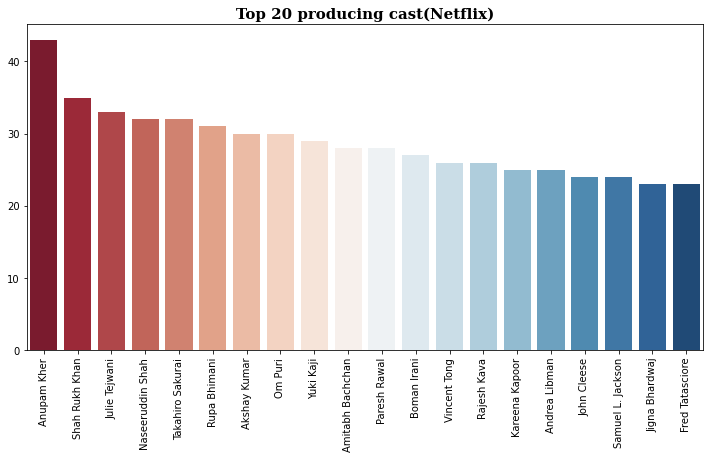

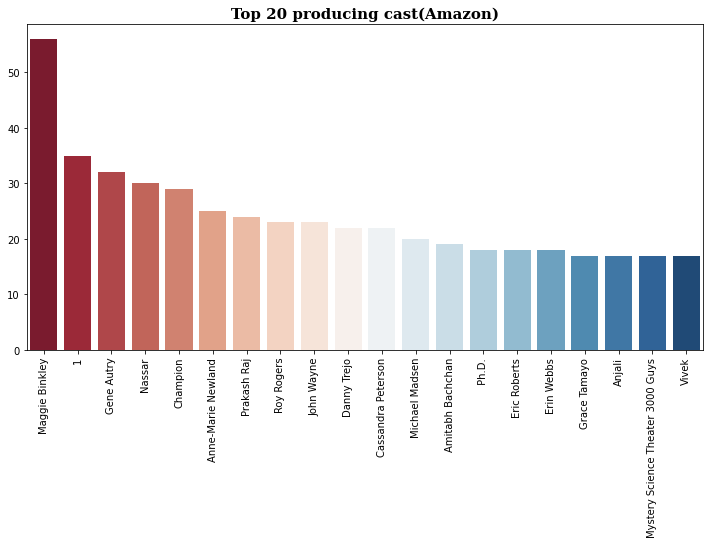

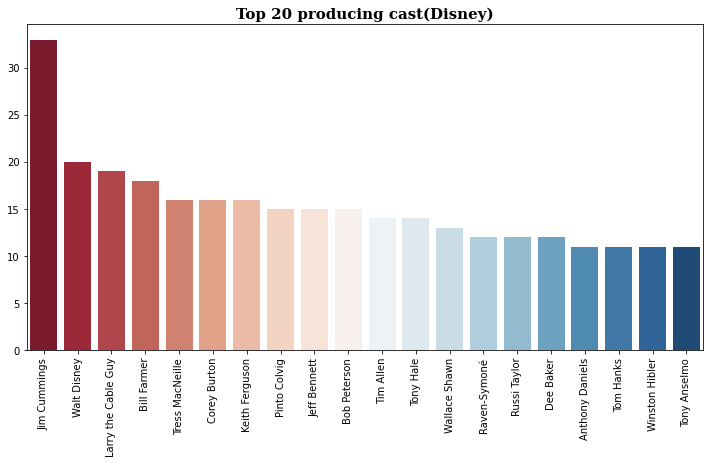

In [22]:
# 넷플릭스
cast_data = netflix['cast']

for i in range(len(cast_data)):
    cast_data[i] = str(cast_data[i])
# counter: 주어진 데이터를 카운팅하여 많은 순으로 나타냄
from collections import Counter
cast_counting = pd.Series(dict(Counter(','.join(cast_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
cast_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(cast_counting)
top20 = sum(cast_counting[:20])

top20_cast = cast_counting[:20]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,  #nrows: 행의 수/ncols: 열의 수
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_cast.index, top20_cast, ax=ax, palette='RdBu')
ax.set_xticklabels(top20_cast.index, rotation='90')
ax.set_title('Top 20 producing cast(Netflix)', font='serif', fontsize=15, fontweight='bold') #font: 글꼴 설정

plt.show()


# 아마존
cast_data = amazon['cast']

for i in range(len(cast_data)):
    cast_data[i] = str(cast_data[i])
from collections import Counter
cast_counting = pd.Series(dict(Counter(','.join(cast_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
cast_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(cast_counting)
top20 = sum(cast_counting[:20])

top20_cast = cast_counting[:20]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_cast.index, top20_cast, ax=ax, palette='RdBu')
ax.set_xticklabels(top20_cast.index, rotation='90')
ax.set_title('Top 20 producing cast(Amazon)', font='serif', fontsize=15, fontweight='bold')

plt.show()


# 디즈니
cast_data = disney['cast']

for i in range(len(cast_data)):
    cast_data[i] = str(cast_data[i])
from collections import Counter
cast_counting = pd.Series(dict(Counter(','.join(cast_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
cast_counting.drop(['NoDataAvailable'], axis=0, inplace=True)
tot = sum(cast_counting)
top20 = sum(cast_counting[:20])

top20_cast = cast_counting[:20]

from matplotlib import gridspec

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios=[6],
                      width_ratios=[10, 5])

ax = plt.subplot(gs[0])
sns.barplot(top20_cast.index, top20_cast, ax=ax, palette='RdBu')
ax.set_xticklabels(top20_cast.index, rotation='90')
ax.set_title('Top 20 producing cast(Disney)', font='serif', fontsize=15, fontweight='bold')

plt.show()

**[배우 내용 정리]**

* Netflix에서는 Anupam Kher 배우의 출현 비중이 크다.
* Amazon에서는 Maggie Binkley 배우의 출현 비중이 크다.
* Disney에서는 Jim Cummings 배우의 출현 비중이 크다.

**⇒ 만약 좋아하는 배우가 있다면 위 데이터를 통해 배우의 출현 빈도가 높은 OTT 서비스 사용을 고려해볼 수 있다.**

### 3.3 Director Analysis

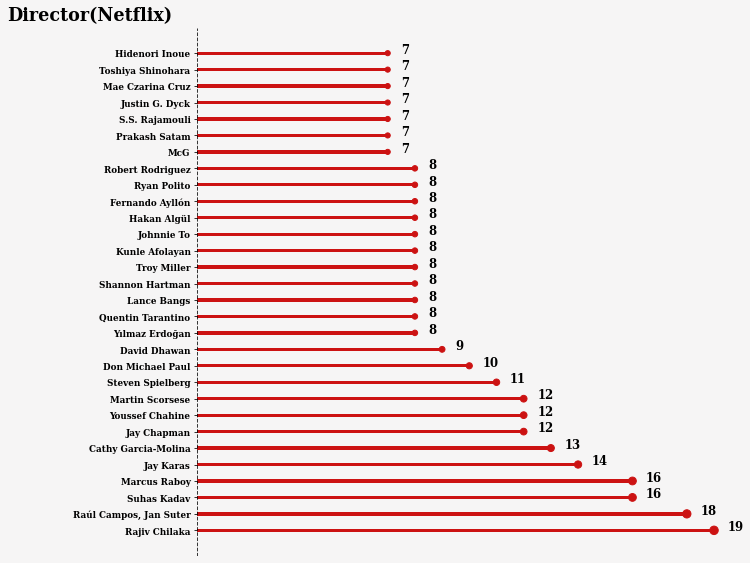

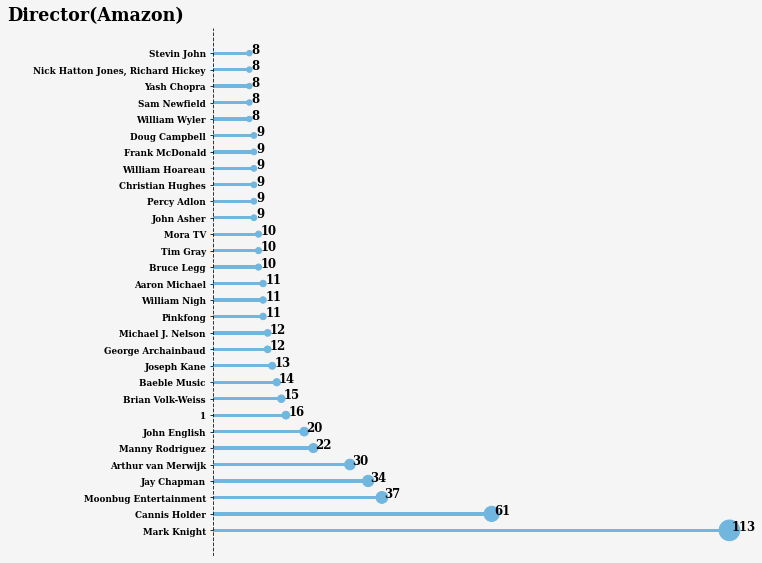

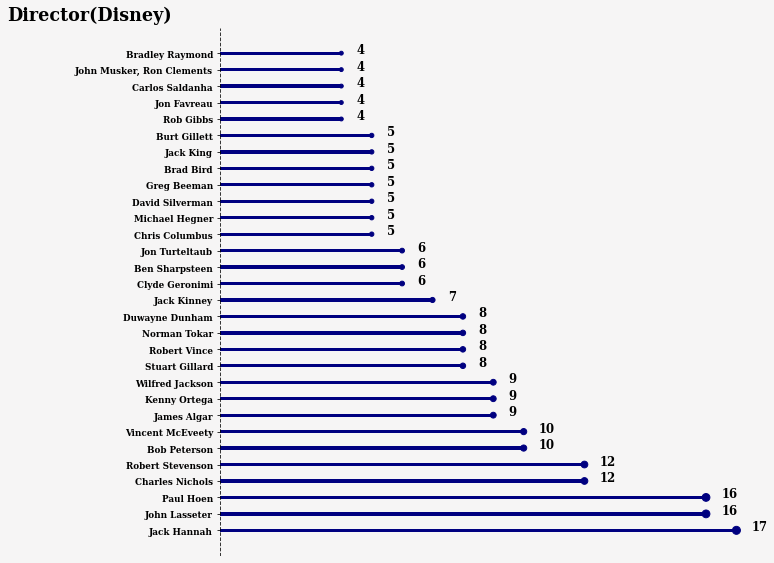

In [23]:
# 넷플릭스

# Series의 index, value를 x, y 지정
x = netflix.director.value_counts()[1:31].index,
y = netflix.director.value_counts()[1:31].values

fig,ax = plt.subplots(figsize = (10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# 수평막대
ax.barh(y = range(1,31), width = y, height = 0.2, color = '#cc1212')
# 선끝에 원 그리기
ax.scatter(y = range(1,31), x = y, s = (y) *4, c = '#cc1212')
# text, 수평막대 사이의 세로선
ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y, range(1, 31)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12, 'weight':'bold'})

# 그래프 눈금
ax.set_yticks(ticks = range(1,31))
ax.set_yticklabels(x[0].tolist()[0:31], {'font':'serif', 'size':9, 'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

# text 조건
ax.text(-7, 32, 'Director(Netflix)',{'font':'serif', 'size':18, 'weight':'bold'})
plt.box(None)

fig.show()


# 아마존
x = amazon.director.value_counts()[1:31].index,
y = amazon.director.value_counts()[1:31].values

fig,ax = plt.subplots(figsize = (10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y = range(1,31), width = y, height = 0.2, color = '#71b6df')
ax.scatter(y = range(1,31), x = y, s = (y) *4, c = '#71b6df')
ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y, range(1, 31)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12, 'weight':'bold'})

ax.set_yticks(ticks = range(1,31))
ax.set_yticklabels(x[0].tolist()[0:31], {'font':'serif', 'size':9, 'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

ax.text(-45, 32, 'Director(Amazon)',{'font':'serif', 'size':18, 'weight':'bold'})
plt.box(None)

fig.show()


# 디즈니
x = disney.director.value_counts()[1:31].index,
y = disney.director.value_counts()[1:31].values

fig,ax = plt.subplots(figsize = (10,10),dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

ax.barh(y = range(1,31), width = y, height = 0.2, color = '#000080')
ax.scatter(y = range(1,31), x = y, s = (y) *4, c = '#000080')
ax.axvline(x = 0, ymin = 0, ymax = 1, **{'linewidth':1, 'linestyle':'--', 'color':'black'}, alpha = 0.8)

for i, j in zip(y, range(1, 31)):
    ax.text(i+0.5,j,i,{'font':'serif', 'size':12, 'weight':'bold'})

ax.set_yticks(ticks = range(1,31))
ax.set_yticklabels(x[0].tolist()[0:31], {'font':'serif', 'size':9, 'weight':'bold'})
ax.set_xticklabels(labels = [])
ax.set_xticks(ticks = [])

ax.text(-7, 32, 'Director(Disney)',{'font':'serif', 'size':18, 'weight':'bold'})
plt.box(None)

fig.show()

**[감독 내용 정리]**

* Netflix에서는 Rajiv Chilaka 감독이 가장 많은 작품에 참여하고 감독했다. 
* Amazon에서는 Mark Knight 감독이 가장 많은 작품에 참여하고 감독했다. 
* Disney에서는 Jack Hannah	감독이 가장 많은 작품에 참여하고 감독했다. 

**⇒ 만약 좋아하는 감독이 있다면 위 데이터를 통해 해당 감독의 작품 참여 빈도가 높은 OTT 서비스 사용을 고려해볼 수 있다.**

### 3.4 Country Analysis

In [24]:
# 넷플릭스
country = netflix.country.value_counts()

coun = {} #coun 뜻은....
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip() # strip: 공백 제거
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

netflix_temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False)) # sort_values : 값을 기준으로 정렬하는 메소드

In [25]:
# 아마존
country = amazon.country.value_counts()

coun = {}
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

amazon_temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False))

In [26]:
# 디즈니
country = disney.country.value_counts()

coun = {}
for idx, val in country.items():
    l = idx.split(',')
    for i in l:
        i = i.strip()
        if i in coun.keys():
            d = {}
            d[i] = val + coun[i]
            coun.update(d)
        else:
            d = {i:val}
            coun.update(d)

nation, count = [],[]
for idx, val in coun.items():
    nation.append(idx)
    count.append(val)

disney_temp = (pd.DataFrame({'country':nation, 'count': count})
        .sort_values('count', ascending = False))

 not found in regex
West Germany not found in regex
Soviet Union not found in regex
East Germany not found in regex


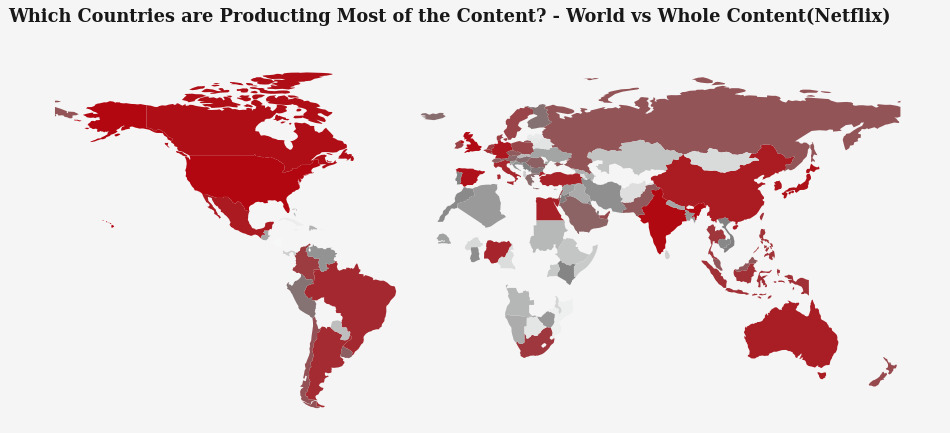

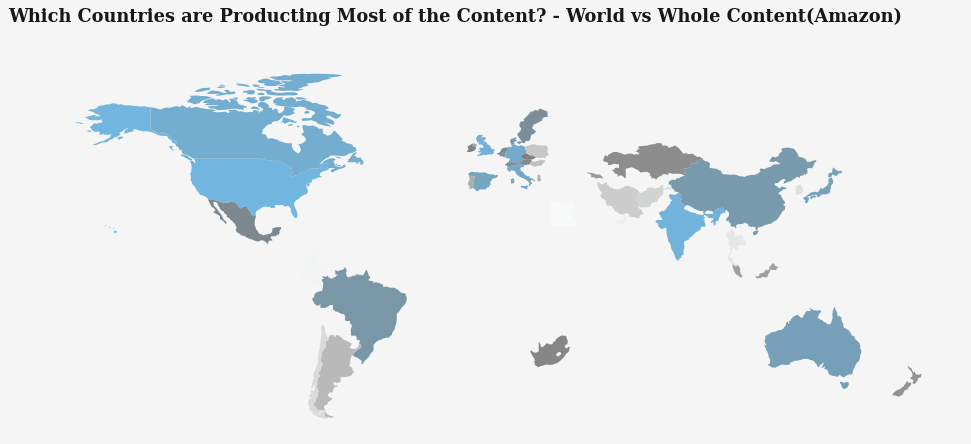

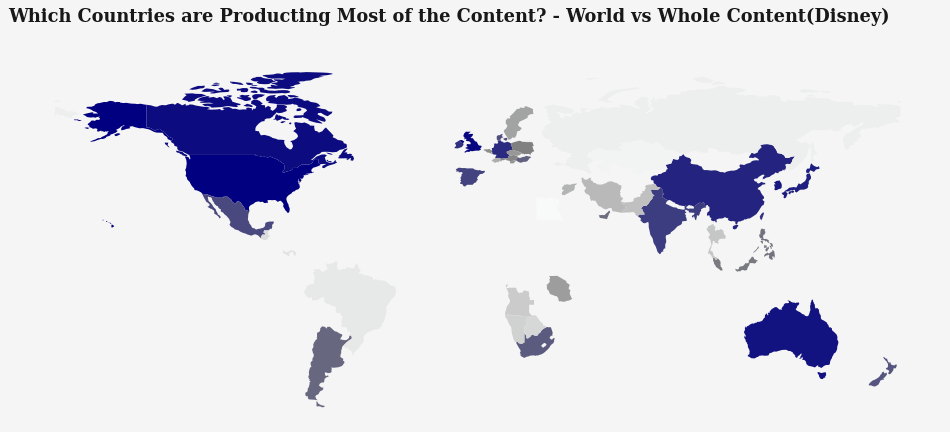

In [27]:
# 넷플릭스
netflix_temp['color'] = netflix_temp['count'].apply(lambda x : '#b20710' if x > netflix_temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
netflix_temp['iso_code'] = coco.convert(names=netflix_temp['country'], to ='ISO3')
netflix_temp = netflix_temp[netflix_temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
netflix_temp_map = world.merge(netflix_temp,left_on = 'iso_a3', right_on = 'iso_code')

netflix_temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
netflix_temp_map = netflix_temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#b20710','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
netflix_temp_map.dropna().plot(column = 'count', 
                       color = netflix_temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries are Producting Most of the Content? - World vs Whole Content(Netflix)', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
fig.show()


# 아마존
amazon_temp['color'] = amazon_temp['count'].apply(lambda x : '#71b6df' if x > amazon_temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
amazon_temp['iso_code'] = coco.convert(names=amazon_temp['country'], to ='ISO3')
amazon_temp = amazon_temp[amazon_temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
amazon_temp_map = world.merge(amazon_temp,left_on = 'iso_a3', right_on = 'iso_code')

amazon_temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
amazon_temp_map = amazon_temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#71b6df','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
amazon_temp_map.dropna().plot(column = 'count', 
                       color = amazon_temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries are Producting Most of the Content? - World vs Whole Content(Amazon)', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
fig.show()


# 디즈니
disney_temp['color'] = disney_temp['count'].apply(lambda x : '#000080' if x > disney_temp['count'].values[30] else 'grey')

#loading geodataframe
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#converting country names to iso codes
disney_temp['iso_code'] = coco.convert(names=disney_temp['country'], to ='ISO3')
disney_temp = disney_temp[disney_temp['iso_code'] != 'not found']

# merging geodataframe and pandas dataframe
disney_temp_map = world.merge(disney_temp,left_on = 'iso_a3', right_on = 'iso_code')

disney_temp_map.drop(columns = ['continent', 'gdp_md_est','pop_est','name',], inplace = True)
disney_temp_map = disney_temp_map.sort_values(by = 'count', ascending = False)


#viualization
colors = ['#000080','grey','#f8f9f9',]
cmap  = matplotlib.colors.LinearSegmentedColormap.from_list("", colors = colors)

fig, ax  = plt.subplots(figsize = (15,7.5), dpi = 80)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')
disney_temp_map.dropna().plot(column = 'count', 
                       color = disney_temp_map.dropna()['color'], 
                       cmap = cmap,
                       scheme='quantiles', 
                       k=10, legend = False,
                       ax = ax)

for loc in ['left','right','top','bottom']:
    ax.spines[loc].set_visible(False)
ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

ax.text(-200,104,'Which Countries are Producting Most of the Content? - World vs Whole Content(Disney)', {'font':'serif', 'size':16, 'weight':'bold'}, alpha = 0.9)
fig.show()

**[나라 내용 정리]**

* 모든 데이터셋에서 가장 많은 컨텐츠가 만들어진 나라는 미국이다. 
* 미국 외에 인도, 영국 등의 나라도 확인할 수 있다.
* 다양한 나라의 수가 넷플릭스, 디즈니, 아미존의 순인 것을 확인할 수 있다. 

**⇒ 가장 많은 비중을 차지하는 나라가 미국인 것에는 모든 데이터가 동일하다. 만약 다양한 나라의 컨텐츠를 보고 싶다면 넷플릭스 구독을 고려할 수 있다.**

### 3.5 Genre Analysis

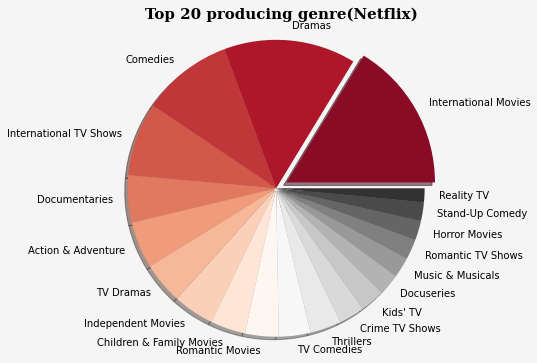

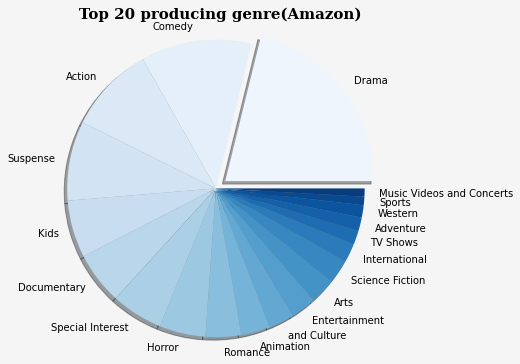

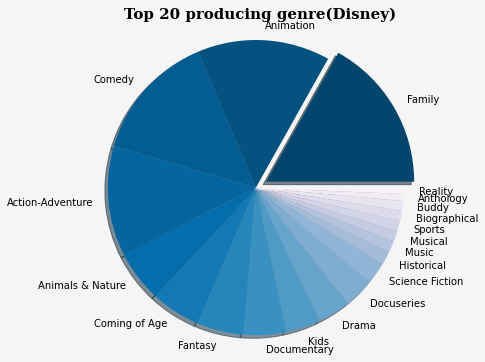

In [28]:
# 넷플릭스

# 'listed_in' data를 pandas Series로 가져오기
listed_in_data = netflix['listed_in']

# 'listed_in' data를 str로 만들기
for i in range(len(listed_in_data)):
    listed_in_data[i] = str(listed_in_data[i])

# Series의 문자를 join -> ','를 정리 -> ','로 분리 -> Counter을 이용해서 개수 세기 -> dict -> pc.Series->내림차순정리
# Counter를 하면 Counter.Collection 객체이므로 Dict로 변환
listed_in_counting = pd.Series(dict(Counter(','.join(listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)


tot = sum(listed_in_counting)
top20 = sum(listed_in_counting[:20])

top20_listed_in = listed_in_counting[:20]

# fig 정의
fig = plt.figure(figsize=(20,6))

# gridspec - 여러 그래프 그릴 때 사용
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios=[6],
                      width_ratios=[10, 5])

# '0'이 20개인 list만들기
explode = [0 for _ in range(20)]
explode[0] = 0.08

# sumplot 정의
ax2 = plt.subplot(gs[1])
fig.patch.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')

# 원 그래프 정의
ax2.pie(top20_listed_in, labels=top20_listed_in.index,
       shadow=True, startangle=0, explode=explode,
       colors=sns.color_palette('RdGy', n_colors=20)
       )

# 데이터에서 x 및 y에 대한 플롯 단위로 동일한 스케일링
ax2.axis('equal')
ax2.set_title('Top 20 producing genre(Netflix)', font='serif', fontsize=15, fontweight='bold')
plt.show()


# 아마존
listed_in_data = amazon['listed_in']

for i in range(len(listed_in_data)):
    listed_in_data[i] = str(listed_in_data[i])

listed_in_counting = pd.Series(dict(Counter(','.join(listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
# listed_in_counting.drop(axis=0, inplace=True)
tot = sum(listed_in_counting)
top20 = sum(listed_in_counting[:20])

top20_listed_in = listed_in_counting[:20]

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios=[6],
                      width_ratios=[10, 5])

explode = [0 for _ in range(20)]
explode[0] = 0.08

ax2 = plt.subplot(gs[1])
fig.patch.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')


ax2.pie(top20_listed_in, labels=top20_listed_in.index,
       shadow=True, startangle=0, explode=explode,
       colors=sns.color_palette('Blues', n_colors=20)
       )
ax2.axis('equal')
ax2.set_title('Top 20 producing genre(Amazon)', font='serif', fontsize=15, fontweight='bold')

plt.show()


# 디즈니
listed_in_data = disney['listed_in']

for i in range(len(listed_in_data)):
    listed_in_data[i] = str(listed_in_data[i])

listed_in_counting = pd.Series(dict(Counter(','.join(listed_in_data).replace(' ,',',').replace(', ',',').split(',')))).sort_values(ascending=False)
# listed_in_counting.drop(axis=0, inplace=True)
tot = sum(listed_in_counting)
top20 = sum(listed_in_counting[:20])

top20_listed_in = listed_in_counting[:20]

fig = plt.figure(figsize=(20,6))
gs = gridspec.GridSpec(nrows=1, ncols=2,
                      height_ratios=[6],
                      width_ratios=[10, 5])

explode = [0 for _ in range(20)]
explode[0] = 0.08

ax2 = plt.subplot(gs[1])

fig.patch.set_facecolor('#f6f5f5')
ax2.set_facecolor('#f6f5f5')

ax2.pie(top20_listed_in, labels=top20_listed_in.index,
       shadow=True, startangle=0, explode=explode,
       colors=sns.color_palette('PuBu_r', n_colors=20)
       )
ax2.axis('equal')
ax2.set_title('Top 20 producing genre(Disney)', font='serif', fontsize=15, fontweight='bold')

plt.show()

**[장르 내용 정리]**

* Netflix에서는 International Movies, Dramas, Comedies 순으로 장르가 많다. 
* Amazon에서는 Drama, Comedy, Action 순으로 장르가 많다. 
* Disney에서는 Family, Animation, Comedy 순으로 장르가 많다.

**⇒ 장르 중에서 Drama, Comedy는 모든 데이터셋에서 높은 비중을 차지하고 있는 것을 볼 수 있다. 만약 International Movies를 선호한다면 Netflix를, Action을 좋아한다면 Amazon을, Family 장르를 선호한다면 Disney 구독을 고려해 볼 수 있다.**

### 3.6 Age Group Analysis

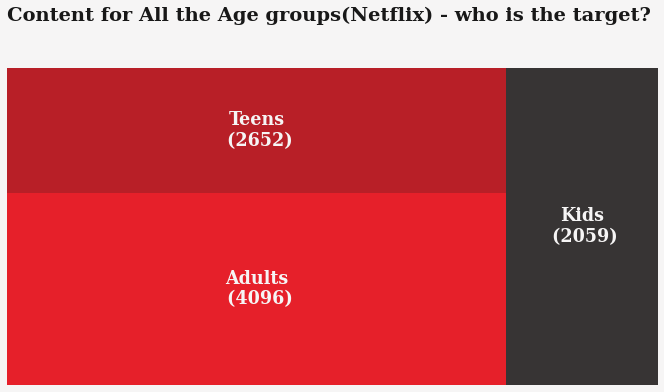

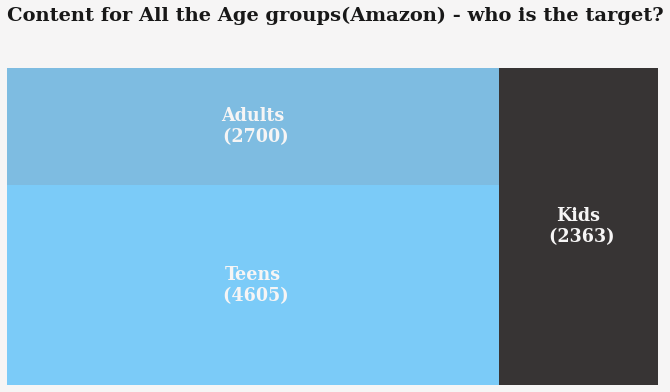

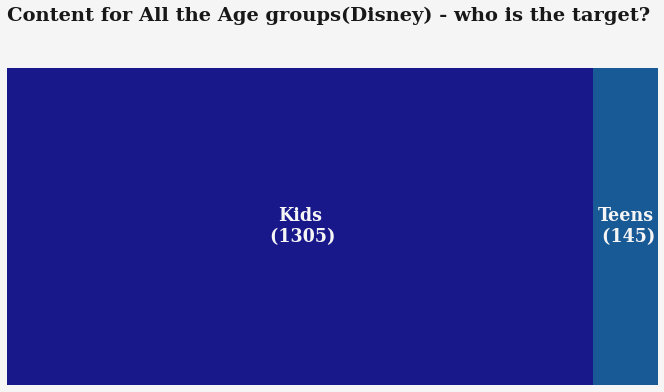

In [29]:
# 넷플릭스
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'R'     : 'Adults',
            'TV-MA' : 'Adults',
            'NC-17' : 'Adults',
            'NR': 'Adults',
            'UR': 'Adults',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 

#creating a new column with age rating
netflix['age_rating'] = netflix['rating'].replace(to_replace = rating)

age_ratings = netflix['age_rating'].value_counts()

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

#squarify.plot: 리스트의 형태로 값을 입력하면 값을 비율에 맞는 넓이를 갖는 사각형 영역으로 표시
squarify.plot(sizes= age_ratings.values, label = labels,
              color = ['#e50914', '#b20710','#221f1f'],
              ax = ax, text_kwargs = {'font':'serif', 'fontsize':'18', 'color': '#f6f5f5', 'weight':'bold'},
              alpha = 0.9)

ax.text(0,114.8, 'Content for All the Age groups(Netflix) - who is the target?',{'font':'serif', 'fontsize':'20', 'color':'black','weight':'bold'}, alpha =0.9)

ax.axis('off')
fig.show()


# 아마존
rating = {'ALL' : 'Kids',
          'ALL_AGES' : 'Kids',
          '7+' : 'Kids',
          'TV-Y' : 'Kids',
          'TV-Y7' : 'Kids',
          'TV-G' : 'Kids',
          'PG' : 'Kids',
          'G' : 'Kids',
          'TV-PG' : 'Kids',
          'PG-13' : 'Teens',
          'TV-14' : 'Teens',
          '13+' : 'Teens',
          '16' : 'Teens',
          '16+' : 'Teens',
          'AGES_16_' : 'Teens',
          'R' : 'Adults',
          'TV-MA' : 'Adults',
          'TV-NR' : 'Adults',
          'NC-17' : 'Adults',
          'NR' : 'Adults',
          '18+' : 'Adults',
          'AGES_18_' : 'Adults',
          'UNRATED' : 'Adults',
          'NOT_RATE' : 'Adults'} 

#creating a new column with age rating
amazon['age_rating'] = amazon['rating'].replace(to_replace = rating)

age_ratings = amazon['age_rating'].value_counts()

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


squarify.plot(sizes= age_ratings.values, label = labels,
              color = ['#6ec7f9', '#71b6df','#221f1f'],
              ax = ax, text_kwargs = {'font':'serif', 'fontSize':'18', 'color': '#f6f5f5', 'weight':'bold'},
              alpha = 0.9)

ax.text(0,114.8, 'Content for All the Age groups(Amazon) - who is the target?',{'font':'serif', 'fontSize':'20', 'color':'black','weight':'bold'}, alpha =0.9)


ax.axis('off')
fig.show()


# 디즈니
rating = {  'TV-Y' : 'Kids',
            'TV-Y7' : 'Kids' ,
            'TV-G'  : 'Kids',
            'PG'    : 'Kids',
            'TV-PG' : 'Kids',
            'PG-13' : 'Teens',
            'TV-14' : 'Teens',
            'TV-Y7-FV':'Kids',
            'G': 'Kids'} 

#creating a new column with age rating
disney['age_rating'] = disney['rating'].replace(to_replace = rating)

age_ratings = disney['age_rating'].value_counts()

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in age_ratings.items()]

fig, ax = plt.subplots(figsize = (12,6), dpi = 70)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')


squarify.plot(sizes= age_ratings.values, label = labels,
              color = ['#000080', '#00498c','#221f1f'],
              ax = ax, text_kwargs = {'font':'serif', 'fontsize':'18', 'color': '#f6f5f5', 'weight':'bold'},
              alpha = 0.9)

ax.text(0,114.8, 'Content for All the Age groups(Disney) - who is the target?',{'font':'serif', 'fontsize':'20', 'color':'black','weight':'bold'}, alpha =0.9)

ax.axis('off')
fig.show()

**[연령 내용 정리]**

* Netflix에서는 컨텐츠가 연령대가 Adults, Teens, Kids 순으로 많다. 
* Amazon에서는 컨텐츠가 연령대가  Teens, Adults, Kids 순으로 많다. 
* Disney에서는 컨텐츠가 연령대가  Kids, Teens 순으로 많다. 

**⇒ 성인이라면 Netflix, 10대라면 Amazon, 어린아이가 있는 가정 또는 동심을 잃지 않은 성인😀은 Disney 구독을 고려할 수 있다.**

### 3.7 Adult Contents with Genre

* 성인 컨텐츠물의 장르를 살펴보자 😏(후훗)

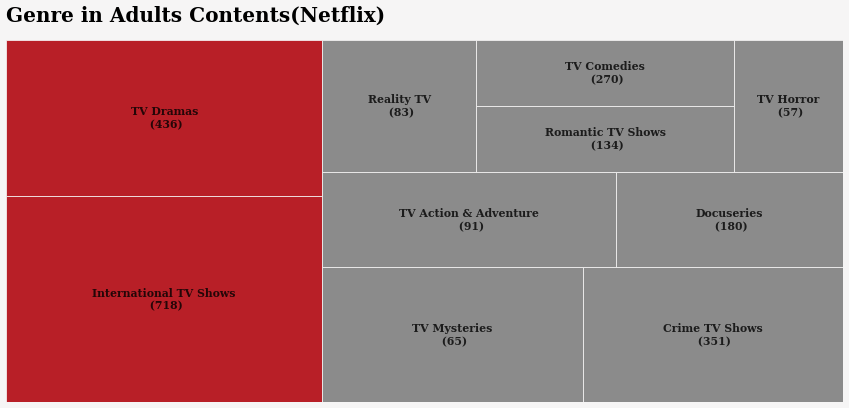

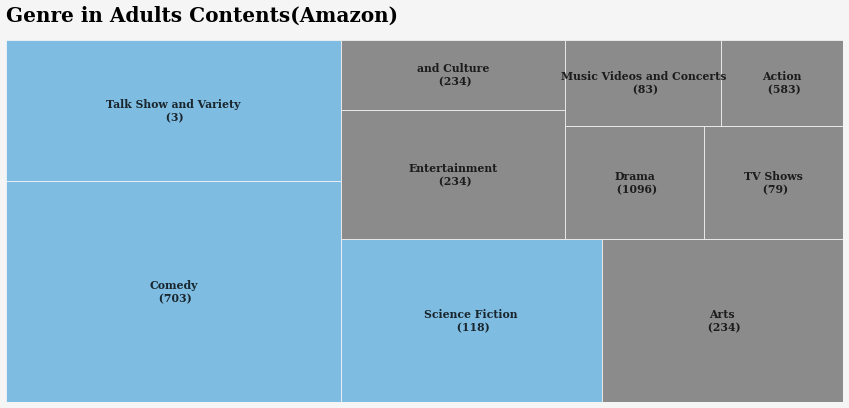

In [30]:
# 넷플릭스

# netflix에서 Adults등급만 분류한 dataframe 만들기
adults = netflix[netflix.age_rating == "Adults"]

# 'listed_in'에서 uinque한 값만 추출해서 list로 만들기
genre_list = adults['listed_in'].unique().tolist()

genre_word = []
for genre in genre_list:
    # 리스트의 단어를 ", "를 기준으로 자르기
    genre_split = genre.split(", ")
    # 분리된 단어를 genre_word에 넣기
    for i in genre_split:
        if i in genre_word or i == "Movies":
            continue
        else:
            genre_word.append(i)

genre_count = {}
for i in genre_word:
    # 추출한 단어를 가지고 딕셔너리 만들기
    genre_count[i] = len(adults[adults['listed_in'].str.contains(i)])

# 딕셔너리를 리스트로 변환 후 데이터 프레임 만들기
adults_genre = pd.DataFrame()
adults_genre['genre'] = list(genre_count.keys())
adults_genre['value'] = list(genre_count.values())
adults_genre = adults_genre.sort_values(by="value", ascending = False)[:10]

# color 정의하기
adults_genre['color'] = adults_genre['value'].apply(lambda x : '#b20710' if x > adults_genre['value'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

# genre, 크기 정의
labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in genre_count.items()]

# 사각형 구분색 지정
bar_kawrgs = {'edgecolor':'#f6f5f5'}
# 사각형 그래프 그리기
squarify.plot(sizes= adults_genre['value'][0:24], label = labels, ax = ax, color = adults_genre['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,105,'Genre in Adults Contents(Netflix)',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()


# 아마존
adults = amazon[amazon.age_rating == "Adults"]

genre_list = adults['listed_in'].unique().tolist()

genre_word = []
for genre in genre_list:
    genre_split = genre.split(", ")
    for i in genre_split:
        if i in genre_word or i == "Movies":
            continue
        else:
            genre_word.append(i)

genre_count = {}
for i in genre_word:
    genre_count[i] = len(adults[adults['listed_in'].str.contains(i)])

adults_genre = pd.DataFrame()
adults_genre['genre'] = list(genre_count.keys())
adults_genre['value'] = list(genre_count.values())
adults_genre = adults_genre.sort_values(by="value", ascending = False)[:10]

adults_genre['color'] = adults_genre['value'].apply(lambda x : '#71b6df' if x > adults_genre['value'].values[3] else 'grey')
# visulaization
fig, ax = plt.subplots(figsize = (18,8), dpi = 60)
fig.patch.set_facecolor('#f6f5f5')
ax.set_facecolor('#f6f5f5')

labels = [ str(idx) + "\n (" + str(val) + ")" for idx, val in genre_count.items()]

bar_kawrgs = {'edgecolor':'#f6f5f5'}
squarify.plot(sizes= adults_genre['value'][0:24], label = labels, ax = ax, color = adults_genre['color'],  **bar_kawrgs,
             text_kwargs = {'font':'serif', 'size':13, 'color':'black', 'weight':'bold', 'alpha':0.8},alpha = 0.9)

ax.text(0,105,'Genre in Adults Contents(Amazon)',{'font':'serif', 'size':24, 'color':'black', 'weight':'bold'}, alpha = 1)

ax.axes.get_xaxis().set_visible(False)
ax.axes.get_yaxis().set_visible(False)

for loc in ['left','right','top', 'bottom']:
    ax.spines[loc].set_visible(False)

fig.show()

**[성인 컨텐츠의 장르 내용 정리]**

* Netflix의 성인 컨텐츠는 Drama, International Movies 순으로 많은 장르를 포함하고 있다. 
* Amazon의 성인 컨텐츠는 Drama, Comedy 순으로 많은 장르를 포함하고 있다.
* Amazon 데이터 결과에서 Comedy 장르는 Love Comedy 장르일 것으로 추측된다.

**⇒ 만약 순한맛의 성인 컨텐츠를 찾는다면 Amazon, 빨간맛의 성인 컨텐츠를 찾는다면 Netflix를 구독하는 것이 합리적(?)이라 판단된다.**

**⇒ 선택은 본인의 몫이겠쥬?😏**

### 4. Content Recommendation

* 내가 좋아하는 영화 또는 TV Show로 넷플릭스와 아마존이 가지고 있는 컨텐츠들 중 어떤 컨텐츠를 추천하는지 확인해본다.
* 추천된 영화 또는 TV Show들 중 내가 좋아하는 작품을 더 많이 추천해준 OTT를 선택하는 것을 고려해볼 수 있을 것이다.
* Disney데이터는 제외하고, 데이터의 성향이 비슷한 Netflix와 Amazon만 다루어 본다.

### 4.1 Netflix

In [31]:
engine_df = netflix.copy()

content_cols = ['title','type','director','cast','country','listed_in','description','age_rating']
engine_df = engine_df[content_cols]

engine_df['text_content'] = (engine_df['title'] + " " +engine_df['type']+" " +engine_df['director']+ " "+engine_df['cast']+ " "+
                      +engine_df['country']+ " " +engine_df['listed_in']+ " "+ engine_df['description']+
                      " " +engine_df['age_rating'])

engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace(','," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('&'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('-',""))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('.'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.lower())

In [32]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

countvect = CountVectorizer()  ### helps in count in words reperated in the text 
count_matrix = countvect.fit_transform(engine_df['text_content']) ## creates nxn count matrix for all the words in corpus
cosine_sim = cosine_similarity(count_matrix)

In [33]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'



def recommend_me(my_title, n = 10, verbose = True):
    "my_title: Name of the show \
     n: number of recommendations"
    
    if n > 30:
        n = 30
    def get_title_from_index(index):
        return engine_df[engine_df.index == index]['title'].values[0]
    def get_index_from_title(title):
        return engine_df[engine_df['title'] == title].index.values[0]
    
    try:
        index_ = get_index_from_title(my_title)
        similar_movies = list(enumerate(cosine_sim[index_]))
        sorted_similar_movies = (sorted(similar_movies, key = lambda x: x[1], 
                                    reverse = True ))[1:] ## sorting based on second element of tuple and removing self
        recommend = []
        print(bcolors.BOLD + bcolors.WARNING +'Top {} Recommendations for you because you liked {}:'.format(n, my_title) + bcolors.ENDC)
    
        for count,val in enumerate(sorted_similar_movies):
            if count >n:
                break
            recommended_ = get_title_from_index(val[0])
            recommend.append(recommended_)
            if verbose:
                print(bcolors.BOLD + bcolors.OKBLUE + recommended_)
            
    except:
        print(bcolors.BOLD + bcolors.WARNING +'There is no content is available as per your liking. May be give me title available on Netflix'+ bcolors.ENDC)
    return None#recommend

In [34]:
recommend_me('WWII in HD',10)

Top 10 Recommendations for you because you liked WWII in HD:
Empire Games
Greatest Events of WWII in Colour
The War: A Film by Ken Burns and Lynn Novick
World War II in Colour
High Score
Battlefield Recovery
Real Rob
Pandemic: How to Prevent an Outbreak
Chef's Table: BBQ
Paranormal Survivor
Kingdoms of the Sky


In [35]:
recommend_me('Underdogs',10,)

Top 10 Recommendations for you because you liked Underdogs:
Little Singham aur Kaal ka Mahajaal
Spookley the Square Pumpkin
BluffMaster!
Jada
The Light of My Eyes
Norm of the North: Family Vacation
Jungle Beat: The Movie
Goon: Last of the Enforcers
Monsoon
Raising Victor Vargas
Bilu Rakkhosh


In [36]:
recommend_me("The Adventures of Tintin",10)

Top 10 Recommendations for you because you liked The Adventures of Tintin:
Bheemayan
Indiana Jones and the Raiders of the Lost Ark
The Power of Grayskull: The Definitive History of He-Man and the Masters of the Universe
Stop at Nothing: The Lance Armstrong Story
Charlotte's Web
NOVA: Day the Dinosaurs Died
The Look of Silence
The Tigers of Scotland
Shiva: The Secret World Of Vedas City
Secrets of Henry VIII's Palace: Hampton Court
The Legend of 420


In [37]:
recommend_me("Survivors Guide to Prison",10)

Top 10 Recommendations for you because you liked Survivors Guide to Prison:
13TH
Studio 54
The Legend of 420
The Force
Catching the Sun
Nail Bomber: Manhunt
Born to Play
Operation Varsity Blues: The College Admissions Scandal
The Speed Cubers
The River Runner
Virunga: Gorillas in Peril


In [38]:
recommend_me("Suits",10)

Top 10 Recommendations for you because you liked Suits:
Argon
Possessed
Rugal
A Man Called God
A Korean Odyssey
Stranger
Tong: Memories
Mr. Sunshine
Cain and Abel
Hyena
Let’s Eat


### 4.2 Amazon

In [39]:
engine_df = amazon.copy()

content_cols = ['title','type','director','cast','country','listed_in','description','age_rating']
engine_df = engine_df[content_cols]

engine_df['text_content'] = (engine_df['title'] + " " +engine_df['type']+" " +engine_df['director']+ " "+engine_df['cast']+ " "+
                      +engine_df['country']+ " " +engine_df['listed_in']+ " "+ engine_df['description']+
                      " " +engine_df['age_rating'])

engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace(','," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('&'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('-',""))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.replace('.'," "))
engine_df['text_content'] = engine_df['text_content'].apply(lambda x: x.lower())

In [40]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

countvect = CountVectorizer()  ### helps in count in words reperated in the text 
count_matrix = countvect.fit_transform(engine_df['text_content']) ## creates nxn count matrix for all the words in corpus
cosine_sim = cosine_similarity(count_matrix)

In [41]:
class bcolors:
    HEADER = '\033[95m'
    OKBLUE = '\033[94m'
    OKCYAN = '\033[96m'
    OKGREEN = '\033[92m'
    WARNING = '\033[93m'
    FAIL = '\033[91m'
    ENDC = '\033[0m'
    BOLD = '\033[1m'
    UNDERLINE = '\033[4m'



def recommend_me(my_title, n = 10, verbose = True):
    "my_title: Name of the show \
     n: number of recommendations"
    
    if n > 30:
        n = 30
    def get_title_from_index(index):
        return engine_df[engine_df.index == index]['title'].values[0]
    def get_index_from_title(title):
        return engine_df[engine_df['title'] == title].index.values[0]
    
    try:
        index_ = get_index_from_title(my_title)
        similar_movies = list(enumerate(cosine_sim[index_]))
        sorted_similar_movies = (sorted(similar_movies, key = lambda x: x[1], 
                                    reverse = True ))[1:] ## sorting based on second element of tuple and removing self
        recommend = []
        print(bcolors.BOLD + bcolors.WARNING +'Top {} Recommendations for you because you liked {}:'.format(n, my_title) + bcolors.ENDC)
    
        for count,val in enumerate(sorted_similar_movies):
            if count >n:
                break
            recommended_ = get_title_from_index(val[0])
            recommend.append(recommended_)
            if verbose:
                print(bcolors.BOLD + bcolors.OKBLUE + recommended_)
            
    except:
        print(bcolors.BOLD + bcolors.WARNING +'There is no content is available as per your liking. May be give me title available on Amazon Prime'+ bcolors.ENDC)
    return None#recommend

In [42]:
recommend_me('WWII in HD',10)

Top 10 Recommendations for you because you liked WWII in HD:
The Cat in the Hat Knows a Lot About That!
Soviet Storm: World War II in the East
This is Paris, 50 years of passion
The Amish and the Reformation
Mystery Of Mr. Wong
Cuban Missile Crisis: Three Men Go to War
Atlantic: A Year in the Wild
Joanna Lumley: Jewel in the Nile
Heroes of the Alamo
The Fades
Nazi Quest for the Holy Grail


In [43]:
recommend_me('Underdogs',10,)

Top 10 Recommendations for you because you liked Underdogs:
Sound! Euphonium: The Movie - Welcome To The Kitauji High School Concert Band
Score
Forced Orphans
Good Kisser
Supa Strikas - A Team Above All
The Extraordinary Tale of William Buckley: The great untold story of Australia's Robinson Crusoe
Block Burning
A Most Beautiful Thing
Molokai: The Story Of Father Damien
Romulus, My Father
Supa Strikas - One Team One Dream


In [44]:
recommend_me("The Adventures of Tintin",10)

Top 10 Recommendations for you because you liked The Adventures of Tintin:
Napoleon: The Man Who Would Rule Europe
This is Paris, 50 years of passion
Owlegories
The Wubbulous World of Dr. Seuss
The Cat in the Hat Knows a Lot About That!
The Garfield Show
Pistorius
Babar
Niko and the Sword of Light
Lore
Heart of the World: Colorado's National Parks


In [45]:
recommend_me("Survivors Guide to Prison",10)

Top 10 Recommendations for you because you liked Survivors Guide to Prison:
Revelation Trail
Timber War
The Saturn V Story
The Spectaculars
Deadly Game
Captured in Chinatown
Return to the Mackenzie - Expedition Overland
Mystery Of Mr. Wong
Sword Oratoria: Is it Wrong to Try to Pick Up Girls in a Dungeon? On the Side
Angry, White and American
Meet Dr. Christian


In [46]:
recommend_me("Suits",10)

Top 10 Recommendations for you because you liked Suits:
Murphy's Law
The Affair
Billions
Series before 1C onboarding - 7
GT Serie 1
Rick Steves' Europe
X-Ray 1C Test Title
London Hospital
Act 5 - Series 2
ACT 2 - Series 6
ACT 2 - Series 9


**[추천받은 작품 비교]**

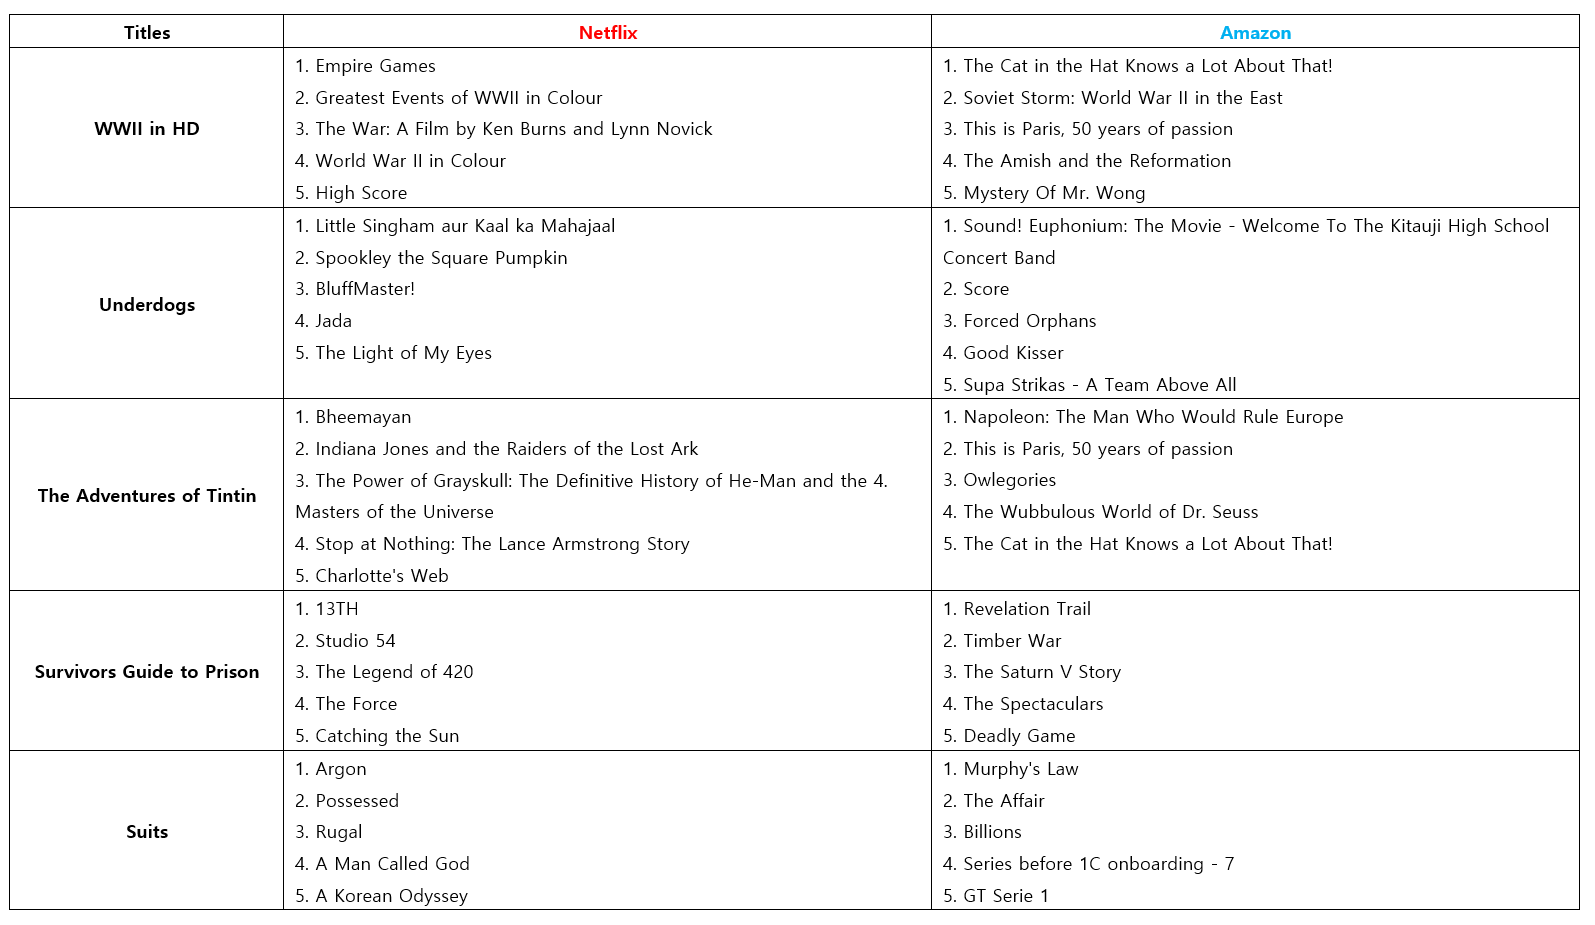

### 5. Conclusion

1. TV Show보다 영화를 더 선호하는 사람들이 Netflix, Amazon, Disney를 구독하는게 나을 것이다.
2. TV Show를 좋아한다면 여기에 있는 OTT 외 다른 OTT를 찾는 것이 좋다.
3. 선호하는 배우와 감독의 경우 개인마다 다 다르므로 분석결과를 보고 알아서 판단하는 것이 나을 것이다.
4. 나라는 모든 데이터에서 미국의 비중이 가장 크게 나왔다. 하지만 다양한 나라의 컨텐츠를 보고싶다면 Netflix를 이용하는 것이 좋다.
5. 4번의 내용은 장르 부분에서도 확인이 가능하다. 
6. 장르의 경우, 만약 International Movies를 선호한다면 Netflix를, Action을 좋아한다면 Amazon을, Family 장르를 선호한다면 Disney를 이용하는 것이 좋다.
7. 컨텐츠의 시청가능 연령대를 확인해보면 성인이라면 Netflix, 10대라면 Amazon, 어린아이가 있는 가정 또는 동심을 잃지 않은 성인😀은 Disney 구독을 생각해 볼 수 있다.
8. 성인 컨텐츠 내에서 다시 장르를 확인했을 때, 순한맛의 성인 컨텐츠를 찾는다면 Amazon, 빨간맛의 성인 컨텐츠를 찾는다면 Netflix를 구독하는 것이 합리적(?)이라 판단된다.😏
9. OTT 데이터 별로 추천시스템을 만든 후 같은 컨텐츠를 넣어 각각 어떤 컨텐츠를 추천해주는지 확인해보았다.
10. 각자 서로 다른 작품들을 추천해주는 것을 확인할 수 있었으며, 좀 더 내가 좋아하는 작품을 추천해준 OTT를 이용하는 것도 좋은 선택일 수 있을 것이다.